In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # 作業 : (Kaggle)房價預測

 # [作業目標]
 - 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

 # [作業重點]
 - 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
 - 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [2]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
"data shape : {}".format(df.shape)



'data shape : (1460, 79)'

In [3]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
"{} Numeric Features : {}".format(len(num_features), num_features)


"36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']"

In [4]:
# 削減文字型欄位, 只剩數值型欄位
# 用 -1 填滿空值, 
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
"data shape : {}".format(df.shape)


'data shape : (1460, 36)'

 # 作業1
 * 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

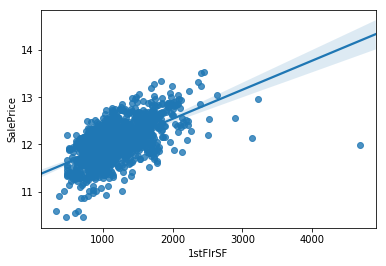

0.846679238745905

In [5]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()


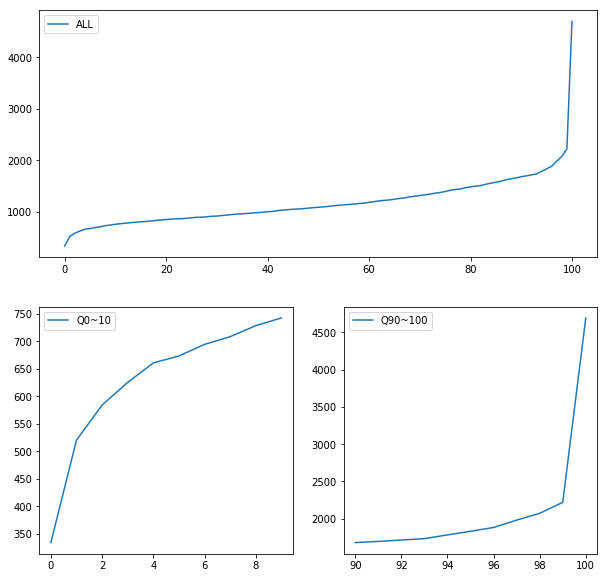

In [6]:
# 找出合理範圍
# 用百分位數大致觀察資料分布
q_all = [df['1stFlrSF'].quantile(i) for i in np.arange(0,1.01,0.01)]
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(q_all)
plt.legend(["ALL"])
plt.subplot(2,2,3)
plt.plot(q_all[:10])
plt.legend(["Q0~10"])
plt.subplot(2,2,4)
plt.plot(np.arange(90,101,1),q_all[90:])
plt.legend(["Q90~100"])
plt.show()


In [7]:
# 由上圖自己定義範圍的上下限
lower_bound = 650
upper_bound = 2500


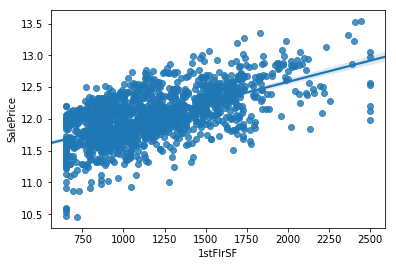

0.8664111199948505

In [8]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
df['1stFlrSF'] = df['1stFlrSF'].clip(lower_bound, upper_bound)
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()


 # 作業2
 * 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,
 請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

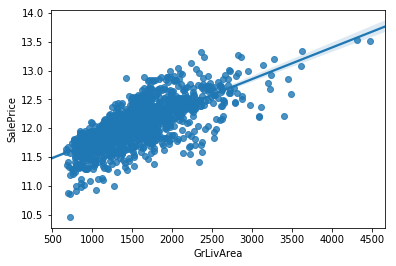

0.8940038001805564

In [9]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
keep_indexs = (df['1stFlrSF']> lower_bound) & (df['1stFlrSF']< upper_bound)
df_drop = df[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df_drop['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df_drop)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()


